In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, metrics, losses, activations, optimizers

## IMDB Review Binary Classification: Positive / Negative

50000 reviews, 88xxx words, but we will consider the most frequent 10000 words

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
max([max(sequence) for sequence in train_data]) # Maximum word index is 9999 because we are considering 10000 most popular words

9999

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for key, value in word_index.items()])
decoded_review = ' '.join(reverse_word_index.get(i - 3, '_') for i in train_data[0])
decoded_review

"_ this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert _ is an amazing actor and now the same being director _ father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for _ and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also _ to the two little boy's that played the _ of norman and paul they were just brilliant children are often left out of the _ list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [5]:
# Preparing the Data:
# 2 Approaches:
# 1. Pad every review to contain a set number of tokens (integers in this case)
# 2. Multi-hot Encode the lists.
# 2nd approach followed here

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_test.shape

(25000, 10000)

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype(np.float32)
y_test = np.asarray(test_labels).astype(np.float32)

In [8]:
x_val = x_train[:10000]
x_train = x_train[10000:]
y_val  = y_train[:10000]
y_train = y_train[10000:]

In [9]:
model = keras.Sequential([
    layers.Dense(16, activation=activations.relu),
    layers.Dense(16, activation=activations.relu),
    layers.Dense(1, activation=activations.sigmoid)
])

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2023-07-18 10:36:43.404255: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-18 10:36:43.404379: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.BinaryCrossentropy(),
              metrics=[metrics.BinaryAccuracy()])

In [11]:
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)

2023-07-18 10:36:43.838377: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-18 10:36:44.088222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-18 10:36:44.961116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [12]:
def visualize(history):

    plt.figure(figsize=(6,6))

    for key in history.history.keys():
        if 'loss' in key.split('_'):
            continue
        plt.plot(history.epoch, history.history[key], label=key)

    plt.legend()

    plt.figure(figsize=(6,6))

    for key in history.history.keys():
        if 'accuracy' in key.split('_'):
            continue
        plt.plot(history.epoch, history.history[key], label=key)

    plt.legend()

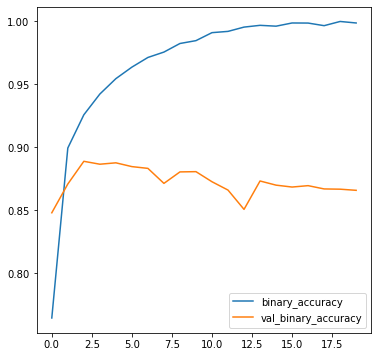

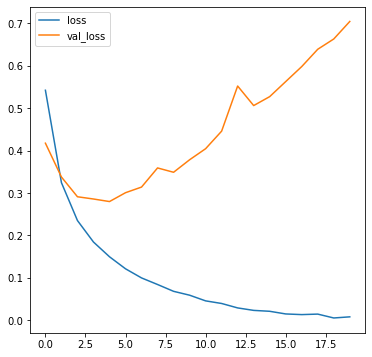

In [13]:
visualize(history)

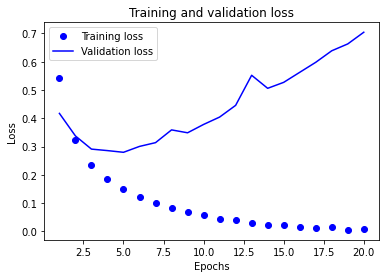

In [14]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

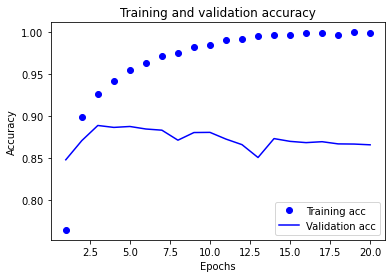

In [15]:
plt.clf()                           
acc = history_dict["binary_accuracy"]
val_acc = history_dict["val_binary_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation=activations.relu),
    layers.Dense(16, activation=activations.relu),
    layers.Dense(1, activation=activations.sigmoid)
])

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.BinaryCrossentropy(),
              metrics=[metrics.BinaryAccuracy()])

model.fit(x_train, y_train, epochs=4, batch_size=512, verbose=0)
results = model.evaluate(x_test, y_test)

2023-07-18 10:36:54.567994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 18/782 [..............................] - ETA: 4s - loss: 0.2827 - binary_accuracy: 0.8854 

2023-07-18 10:36:57.133799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 5s 6ms/step - loss: 0.3026 - binary_accuracy: 0.8785


In [17]:
results

[0.3025522232055664, 0.8785200715065002]

In [18]:
model.predict(x_test)

2023-07-18 10:37:02.395302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.36747202],
       [0.9998414 ],
       [0.9880976 ],
       ...,
       [0.16290957],
       [0.15328476],
       [0.6410873 ]], dtype=float32)

## Reuters Dataset: Multi-class Classification

46 topics, at least 10 examples per topic

In [19]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
word_index = reuters.get_word_index()
word_index_r = {key: value for (value, key) in word_index.items()}

reuters_label_index =['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
                        'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
                        'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
                        'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
                        'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

In [20]:
len(train_data)

8982

In [21]:
' '.join([word for word in [word_index_r.get(i - 3, '_') for i in train_data[0]]])

'_ _ _ said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [22]:
reuters_label_index[train_labels[0]]

'earn'

In [23]:
x_train, x_test = vectorize_sequences(train_data), vectorize_sequences(test_data)

In [24]:
def one_hot_encode(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [25]:
y_train, y_test = one_hot_encode(train_labels), one_hot_encode(test_labels)

In [26]:
# Built-in One Hot Encoding mechanism:

from tensorflow.keras.utils import to_categorical

y_train, y_test = to_categorical(train_labels), to_categorical(test_labels)

In [27]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
x_val = x_train[:1000]
x_train = x_train[1000:]
y_val = y_train[:1000]
y_train = y_train[1000:]

In [29]:
model = keras.Sequential([
    layers.Dense(64, activation=activations.relu),
    layers.Dense(64, activation=activations.relu),
    layers.Dense(46, activation=activations.softmax)
])

In [30]:
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.CategoricalCrossentropy(),
              metrics=[metrics.CategoricalAccuracy()])

In [31]:
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)

2023-07-18 10:37:05.644534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-18 10:37:06.133617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


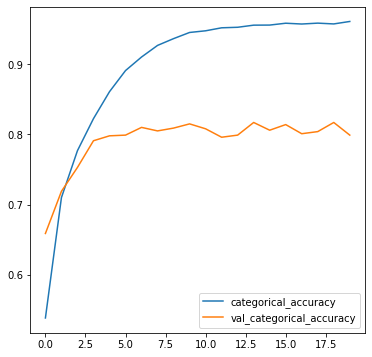

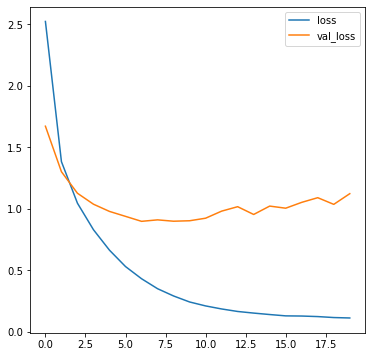

In [32]:
visualize(history)

The model overfits after 9 epochs. Let's train the model again for 9 epochs and evaluate on the test set.

2023-07-18 10:37:10.721406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-18 10:37:11.207303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 1s 9ms/step - loss: 0.9817 - categorical_accuracy: 0.7867
[0.9817217588424683, 0.7867319583892822]


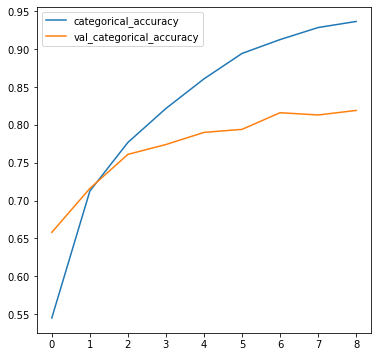

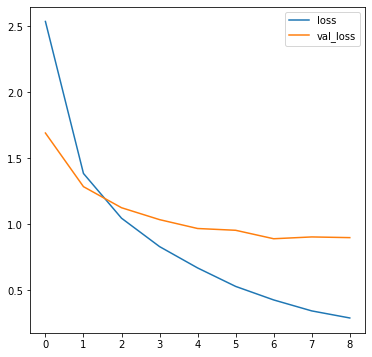

In [33]:
model = keras.Sequential([
    layers.Dense(64, activation=activations.relu),
    layers.Dense(64, activation=activations.relu),
    layers.Dense(46, activation=activations.softmax)
])

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.CategoricalCrossentropy(),
              metrics=[metrics.CategoricalAccuracy()])

history = model.fit(x_train,
                    y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)

results = model.evaluate(x_test, y_test)
print(results)
visualize(history)

In [34]:
predictions = model.predict(x_test)
j = 2

print(x_test[j])
print(predictions[j].shape)
print(np.sum(predictions[j]))
print(' '.join([word for word in [word_index_r.get(i - 3, '_') for i in test_data[j]]]))
print(f'{np.max(predictions[j]):.3f}, {np.argmax(predictions[j])}, {reuters_label_index[np.argmax(predictions[j])]}')

2023-07-18 10:37:13.916821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0. 1. 1. ... 0. 0. 0.]
(46,)
1.0000001
_ the agriculture department's widening of louisiana gulf differentials will affect county posted prices for number two yellow corn in ten states a usda official said all counties in iowa will be affected as will counties which use the gulf to price corn in illinois indiana tennessee kentucky missouri mississippi arkansas alabama and louisiana said _ _ deputy director of commodity operations division for the usda usda last night notified the grain industry that effective immediately all gulf differentials used to price interior corn would be widened on a sliding scale basis of four to eight cts depending on what the differential is usda's action was taken to lower excessively high posted county prices for corn caused by high gulf prices we've been following this louisiana gulf situation for a month and we don't think it's going to get back in line in any nearby time _ said _ said usda will probably narrow back the gulf differentials when and if g

Encoding labels as integer tensors instead of creating one-hot representations:

We would need to change the loss function from categorical crossentropy to sparse categorical crossentropy, and metrics to sparse categorical accuracy

In [35]:
y_train, y_test = np.array(train_labels), np.array(test_labels)

In [36]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [37]:
y_val = y_train[:1000]
y_train = y_train[1000:]

2023-07-18 10:37:14.453385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-18 10:37:15.205232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 0s 6ms/step - loss: 1.0108 - sparse_categorical_accuracy: 0.7787
[1.0107581615447998, 0.7787177562713623]


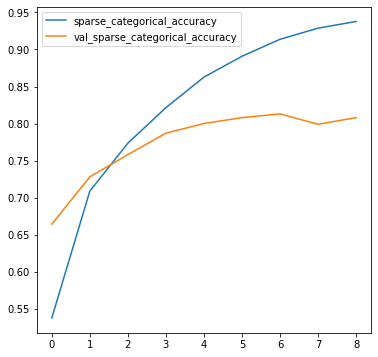

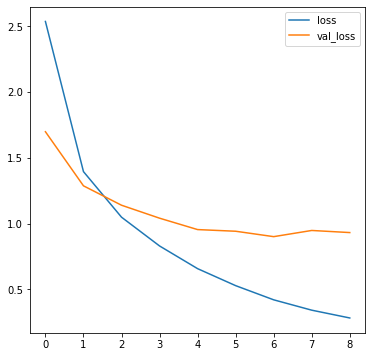

In [38]:
model = keras.Sequential([
    layers.Dense(64, activation=activations.relu),
    layers.Dense(64, activation=activations.relu),
    layers.Dense(46, activation=activations.softmax)
])

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.SparseCategoricalCrossentropy(),
              metrics=[metrics.SparseCategoricalAccuracy()])

history = model.fit(x_train,
                    y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)

results = model.evaluate(x_test, y_test)
print(results)
visualize(history)

## Boston Housing Price Dataset: Regression

506 data points: 404 train, 102 test samples. 13 features.

In [39]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [40]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [41]:
train_targets[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [42]:
# Feature-wise normalization
# Normalize test data with train_data mean and std

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [43]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activations.relu),
        layers.Dense(64, activations.relu),
        layers.Dense(1)
    ])
    model.compile(optimizer=optimizers.RMSprop(),
                  loss=losses.MeanSquaredError(),
                  metrics=[metrics.MeanAbsoluteError()])
    return model

In [44]:
# K Fold Cross Validation

k = 4
num_val_samples = len(train_data) // k 
num_epochs = 100
all_scores = []

for i in range(k):
    print(f'Processing fold {i}')
    start = i * num_val_samples
    end = (i + 1) * num_val_samples
    val_data = train_data[start : end]
    val_targets = train_targets[start : end]
    partial_train_data = np.concatenate([train_data[:start], train_data[end:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:start], train_targets[end:]], axis=0)
    
    model = build_model()
    model.fit(partial_train_data, 
              partial_train_targets, 
              epochs=num_epochs,
              batch_size=16,
              verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

print(all_scores)
print(np.mean(all_scores))

Processing fold 0


2023-07-18 10:37:17.457625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-18 10:37:30.238668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Processing fold 1


2023-07-18 10:37:30.503475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-18 10:37:42.332705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Processing fold 2


2023-07-18 10:37:42.588821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-18 10:37:54.332750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Processing fold 3


2023-07-18 10:37:54.593476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[1.9708648920059204, 2.321164131164551, 2.365933895111084, 2.3116822242736816]
2.242411285638809


2023-07-18 10:38:06.381412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [45]:
k = 4
num_val_samples = len(train_data) // k 
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f'Processing fold {i}')
    start = i * num_val_samples
    end = (i + 1) * num_val_samples
    val_data = train_data[start : end]
    val_targets = train_targets[start : end]
    partial_train_data = np.concatenate([train_data[:start], train_data[end:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:start], train_targets[end:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, 
                        partial_train_targets,
                        validation_data=(val_data, val_targets), 
                        epochs=num_epochs,
                        batch_size=16,
                        verbose=0)
    all_mae_histories.append(history.history['val_mean_absolute_error'])

print(all_mae_histories[:5])

Processing fold 0


2023-07-18 10:38:06.989130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-18 10:38:07.367652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
Processing fold 1


2023-07-18 10:39:20.930765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-18 10:39:21.320718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
Processing fold 2


2023-07-18 10:40:35.114235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-18 10:40:35.528437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
Processing fold 3


2023-07-18 10:41:49.187183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-18 10:41:49.622390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
[[19.058307647705078, 15.775589942932129, 11.367681503295898, 7.357447624206543, 5.354861736297607, 4.3655829429626465, 3.7612977027893066, 3.4299745559692383, 3.2070891857147217, 3.0392568111419678, 2.9469268321990967, 2.9732513427734375, 2.90261173248291, 2.74507999420166, 2.657641649246216, 2.712968349456787, 2.55527400970459, 2.545196771621704, 2.5182158946990967, 2.553061008453369, 2.4544177055358887, 2.332119941711426, 2.2688727378845215, 2.298006296157837, 2.3269572257995605, 2.431057929992676, 2.329118251800537, 2.2161099910736084, 2.396601676940918, 2.138890266418457, 2.3369028568267822, 2.200079917907715, 2.3007607460021973, 2.289614677429199, 2.1238772869110107, 2.243243932723999, 2.1112730503082275, 2.1012589931488037, 2.1401660442352295, 2.0993494987487793, 2.134390354156494, 2.219874143600464, 2.2338764667510986, 2.1509437561035156, 2.3095061779022217, 2.373708963394165, 2.1895840167999268, 

In [46]:
np.array(all_mae_histories).shape

(4, 500)

In [47]:
average_mae_history = np.mean(all_mae_histories, axis=0)

Text(0.5, 1.0, 'Validation MAE by Epoch')

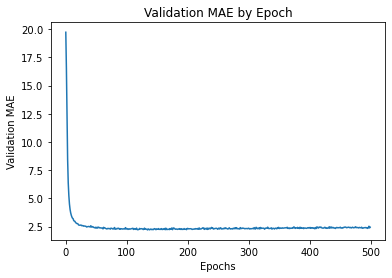

In [48]:
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title('Validation MAE by Epoch')

Text(0.5, 1.0, 'Validation MAE by Epoch, 10th epoch onwards')

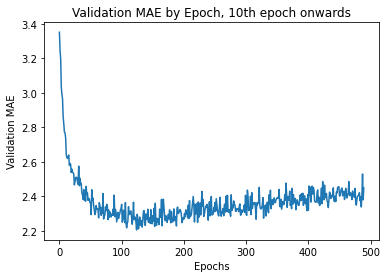

In [49]:
plt.plot(average_mae_history[10:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title('Validation MAE by Epoch, 10th epoch onwards')

We see MAE does not decrease beyond 130th epoch, so we will train our final model on all of the data till epoch 130

In [50]:
model = build_model()
model.fit(train_data, 
          train_targets,
          epochs=130,
          batch_size=16,
          verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

2023-07-18 10:43:04.635248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 11ms/step - loss: 14.0404 - mean_absolute_error: 2.5356


2023-07-18 10:43:26.273135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [51]:
test_mae_score

2.5355610847473145

In [52]:
# Predict using the model

predictions = model.predict(test_data)
predictions[0]

2023-07-18 10:43:26.406309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([9.803658], dtype=float32)